In [10]:
# 워드클라우드 import
from wordcloud import WordCloud,STOPWORDS

# 이미지 저장 및 크기 변경, 필터적용 
from PIL import Image

# # 한글 자연어 처리 패키지
from konlpy.tag import Okt
okt = Okt()

# 자연어 처리 (영어권 언어 처리하는 패키지)
# => 시드폴더 열어서 korean stopwords 직접 만들어 사용.
import nltk

# 빈도수 분석
from nltk import FreqDist
# 자연어 처리에서 토큰화를 수행하는데 사용
nltk.download('punkt')

# 자연어 처리에서 불용어를 제거하는데 사용(리소스 다운)
nltk.download('stopwords')

# stop words import
from nltk.corpus import stopwords

# 단어 토큰화
from nltk.tokenize import word_tokenize

# 그래프 차트 그리기 위한 패키지
import matplotlib.pyplot as plt

# 넘파이 import
import numpy as np

# 판다스 import
import pandas as pd


import os


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\송재원\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\송재원\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [32]:
# 불용어 정의
print(stopwords.words('korean'))

['’', '“', '”', '첫', '만에', '↓', '↑', '것', '망', '파월', '또', '우려에', '로', '더', '날', '내', '4', '&', '25', '된', '없다', '는', '은', '이', '가', '이젠', '안', '못', '2', '3분', '6월', '다양한', '열려', '한복판에', '뜨거운', '관심', '포토', '(', ')', '%', '굴욕', '2위는', '속', '첫번째', '두번째', '세번째', '네번째', '다섯번째', '여섯번째', '일곱번째', '여덟번째', '아홉번째', '열번째', '이제', '이', '수', '지금', '1위', '2위', '3위', '4위', '5위', '6위', '7위', '8위', '9위', '10위', '멈췄으면', '.', '..', '...', "'", "''", '``', '‘', '`', '"', '!', '?', '[', ']', ',', '압도적', '했으면', '그만', '좀', '의', '지금이', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해 ', '을 ', '를 ', '에 ', '의 ', '가 ', '으로 ', '로 ', '에게 ', '뿐이다 ', '의거하여 ', '근거하여 ', '입각하여 ', '기준으로 ', '예하면 ', '예를 ', '들면 ', '예를 들자면 ', '저 ', '소인 ', '소생 ', '저희 ', '지말고 ', '하지마 ', '하지마라 ', '다른', '물론 ', '또한 ', '그리고 ', '비길수 ', '없다 ', '해서는 ', '안된다 ', '뿐만', '아니라', '만이 ', '아니다', '만은', '아니다 ', '막론하고 ', '관계없이 ', '그치지 ', '않다 ', '그러나', '그런데', '하지만 ', '든간에 ', '논하지 ', '않다 ', '따지지 ', '않다 ', '설사 ', '비록 ', '더라도 ', '아니면 ', '만 ', '못하다 ', '하

In [33]:
# 데이터 로드

nflx_news = pd.read_csv('./nflx0415_0430.csv')

In [34]:
# 데이터 전처리 (시각화에 필요없는 컬럼들 삭제)

nflx_wc = nflx_news.drop(['뉴스 식별자', '일자', '언론사', '기고자', '통합 분류1', '통합 분류2', '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'], axis = 1)    

In [35]:
nflx_wc

,제목,키워드
0,지난 백 번의 특별사면은 정말 국민을 통합했을까[그때 그 뉴스],"특별사면,국민,통합,국회,동의,일반,사면,특별사면,정권,임기,시국,사범,특사,집중,..."
1,과거 현재 미래 인문학백화점 ‘민속이란 삶이다’展,"과거,미래,인문학,백화점,민속,서울,삼청동,동쪽,경복궁,국립민속박물관,민속,특별전,..."
2,"[OTT다방] 회의하다 모유 나온 男, 임신 고백하고 맘카페 만든 사연","회의,모유,임신,고백,맘카페,사연,리뷰,켄타로,넷플릭스,히야마,임신,추천,작품,세상..."
3,여자들의 뜨거운 비명을 들어라 [김봉석 윤이나의 정기구독],"여자들,비명,김봉석,윤이나,정기구독,애플,TV,플러스,로어,세상,함성,소설,앤솔러지..."
4,[임병선의 메멘토 모리] 마릴린 먼로의 죽음 보도된 것과 달랐다,"마릴린,먼로,죽음,보도,미국,여배우,세상,명성,미모,명예,주검,발견,5일,현지시간,..."
...,...,...
894,삼성전자만? 아마존 페북도 ‘장투의 배신’,"삼성전자,아마존,페북도,장투,배신,1~2년,서학개미들,수익,저조,한숨,삼성전자,네이..."
895,“차기작은 상어 멸치 김 등 수산물 시리즈”,"차기작,상어,멸치,수산물,시리즈,저주토끼,부커,최종,후보작,저주,토끼,작가,정보,번..."
896,배우 전여빈 넷플릭스 시리즈 ‘너의 시간 속으로' 캐스팅,"배우,전여,넷플릭스,시리즈,캐스팅,강릉,출신,배우,전여빈,사진,넷플릭스,시리즈,캐스..."
897,박찬욱 고레에다 연출 한국영화 2편 칸 경쟁부문 진출...이정재도 감독으로 초청,"박찬욱,고레,2편,연출,한국,영화,경쟁,진출,이정재,감독,초청,박찬욱,감독,일본,고..."


In [36]:
# 제목 불용어처리 후 컬럼 추가

# nflx_wc의 df에서 '제목' 열의 모든 데이터를 공백문자를 이용해 하나의 문자열로 만듦  
sentence = ' '.join(nflx_wc['제목'])  

# 불용어 처리할 리스트 호출
stop_words = set(stopwords.words('korean'))

# 이어붙인 문자열 토큰화
words = word_tokenize(sentence)

# 분리된 단어들 중 불용어에 해당하는 단어를 제외하고 필터링
title_filter_words = [word for word in words if not word in stop_words]

# nflx_kw 컬럼에 추가하기
nflx_wc['title_filter'] = ' '.join(title_filter_words)

In [37]:
nflx_wc

,제목,키워드,title_filter
0,지난 백 번의 특별사면은 정말 국민을 통합했을까[그때 그 뉴스],"특별사면,국민,통합,국회,동의,일반,사면,특별사면,정권,임기,시국,사범,특사,집중,...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
1,과거 현재 미래 인문학백화점 ‘민속이란 삶이다’展,"과거,미래,인문학,백화점,민속,서울,삼청동,동쪽,경복궁,국립민속박물관,민속,특별전,...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
2,"[OTT다방] 회의하다 모유 나온 男, 임신 고백하고 맘카페 만든 사연","회의,모유,임신,고백,맘카페,사연,리뷰,켄타로,넷플릭스,히야마,임신,추천,작품,세상...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
3,여자들의 뜨거운 비명을 들어라 [김봉석 윤이나의 정기구독],"여자들,비명,김봉석,윤이나,정기구독,애플,TV,플러스,로어,세상,함성,소설,앤솔러지...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
4,[임병선의 메멘토 모리] 마릴린 먼로의 죽음 보도된 것과 달랐다,"마릴린,먼로,죽음,보도,미국,여배우,세상,명성,미모,명예,주검,발견,5일,현지시간,...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
...,...,...,...
894,삼성전자만? 아마존 페북도 ‘장투의 배신’,"삼성전자,아마존,페북도,장투,배신,1~2년,서학개미들,수익,저조,한숨,삼성전자,네이...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
895,“차기작은 상어 멸치 김 등 수산물 시리즈”,"차기작,상어,멸치,수산물,시리즈,저주토끼,부커,최종,후보작,저주,토끼,작가,정보,번...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
896,배우 전여빈 넷플릭스 시리즈 ‘너의 시간 속으로' 캐스팅,"배우,전여,넷플릭스,시리즈,캐스팅,강릉,출신,배우,전여빈,사진,넷플릭스,시리즈,캐스...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...
897,박찬욱 고레에다 연출 한국영화 2편 칸 경쟁부문 진출...이정재도 감독으로 초청,"박찬욱,고레,2편,연출,한국,영화,경쟁,진출,이정재,감독,초청,박찬욱,감독,일본,고...",지난 백 번의 특별사면은 정말 국민을 통합했을까 그때 뉴스 과거 현재 미래 인문학백...


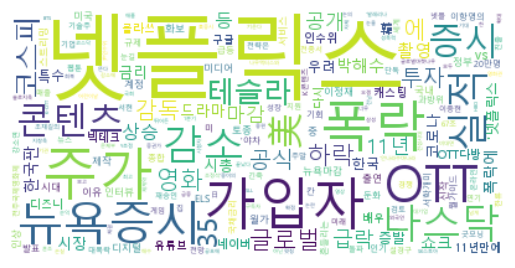

In [39]:
# 빈도 분석한 데이터 추출 후 제목 워드클라우딩

title_filter_list = nflx_wc['title_filter'].tolist()
all_titles = ' '.join(title_filter_list)

# 빈도수 분석
freq_dist = FreqDist(all_titles.split())

# 단어 추출
word = freq_dist.most_common()

# 워드클라우드 생성
font_path='C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(background_color='white',font_path=font_path).generate_from_frequencies(dict(word))

# 그래프 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [40]:
# 불용어 처리된 단어들의 빈도수 추출
word

[('넷플릭스', 182497),
 ('주가', 39556),
 ('가입자', 38657),
 ('폭락', 37758),
 ('OTT', 35061),
 ('뉴욕증시', 33263),
 ('실적', 28768),
 ('감소', 27869),
 ('나스닥', 26071),
 ('美', 23374),
 ('증시', 22475),
 ('콘텐츠', 22475),
 ('테슬라', 20677),
 ('코스피', 19778),
 ('35', 19778),
 ('글로벌', 18879),
 ('영화', 18879),
 ('에', 17980),
 ('하락', 17081),
 ('감독', 15283),
 ('공식', 15283),
 ('투자', 15283),
 ('급락', 14384),
 ('11년', 14384),
 ('공개', 13485),
 ('마감', 13485),
 ('등', 12586),
 ('상승', 12586),
 ('촬영', 11687),
 ('한국판', 10788),
 ('쇼크', 10788),
 ('박해수', 10788),
 ('폭락에', 9889),
 ('드라마', 9889),
 ('시장', 9889),
 ('코로나', 9889),
 ('시총', 9889),
 ('금리', 9889),
 ('우려', 8990),
 ('vs', 8990),
 ('韓', 8990),
 ('특수', 8990),
 ('한국', 8990),
 ("'넷플릭스", 8990),
 ('증발', 8990),
 ('11년만에', 8990),
 ('OTT다방', 8091),
 ('디즈니', 8091),
 ('네이버', 8091),
 ('빅테크', 8091),
 ('다시', 8091),
 ('유튜브', 8091),
 ('구글', 8091),
 ('캐스팅', 8091),
 ('인수위', 8091),
 ('배우', 8091),
 ('클라쓰', 8091),
 ('뉴욕마감', 7192),
 ('ELS', 7192),
 ('서비스', 7192),
 ('정부', 7192),
 ('이유', 7192),
 ('미